In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import time

%precision 3

'%.3f'

---------
종합 연습 문제 1 </br>
손글씨 숫자 데이터를 읽고 홀드 아웃 방식으로 여러 모델을 구축한 뒤 </br>
오차행렬 결과를 출력 </br>
홀드 아웃 시 random_state=0으로 설정

----

<Logistic>
train_data:
[[133   0   0   0   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0   0   0]
 [  0   0 133   0   0   0   0   0   0   0]
 [  0   0   0 137   0   0   0   0   0   0]
 [  0   0   0   0 136   0   0   0   0   0]
 [  0   0   0   0   0 136   0   0   0   0]
 [  0   0   0   0   0   0 136   0   0   0]
 [  0   0   0   0   0   0   0 134   0   0]
 [  0   1   0   0   0   0   0   0 130   0]
 [  0   0   0   0   0   0   0   0   1 134]]
test_data:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  1  0]
 [ 0  1 43  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  1  0  0 43  0  0  0  1  0]
 [ 0  0  0  1  0 44  0  1  0  0]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  3  0  0  0  0  0  0 39  1]
 [ 0  0  0  1  0  1  0  0  0 43]] 

<KNN>
train_data:
[[133   0   0   0   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0   0   0]
 [  0   0 133   0   0   0   0   0   0   0]
 [  0   0   0 136   0   0   0   0   0   1]
 [  0   0   

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<LinearSVC>
train_data:
[[133   0   0   0   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0   0   0]
 [  0   0 133   0   0   0   0   0   0   0]
 [  0   0   0 136   0   0   0   0   1   0]
 [  0   0   0   0 136   0   0   0   0   0]
 [  0   0   0   0   0 136   0   0   0   0]
 [  0   0   0   0   0   0 136   0   0   0]
 [  0   0   0   0   0   0   0 134   0   0]
 [  0   0   1   0   0   0   0   0 128   2]
 [  0   0   0   1   0   0   0   0   1 133]]
test_data:
[[44  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  1  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  1  0  0 43  0  0  0  1  0]
 [ 0  1  0  0  0 45  0  0  0  0]
 [ 0  1  0  0  1  0 43  0  0  0]
 [ 0  1  1  0  0  0  0 43  0  0]
 [ 0  3  0  1  1  0  1  0 37  0]
 [ 0  1  0  2  0  1  0  1  0 40]] 

<SVC>
train_data:
[[133   0   0   0   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0   0   0]
 [  0   0 133   0   0   0   0   0   0   0]
 [  0   0   0 137   0   0   0   0   0   0]
 [  0   0  

accuracy                  f1           precision            \
                   test     train      test     train      test     train   
DecisionTree   0.855556  1.000000  0.855582  1.000000  0.859781  1.000000   
GradientBoost  0.964444  1.000000  0.964811  1.000000  0.966321  1.000000   
KNN            0.982222  0.987379  0.982056  0.987303  0.982398  0.987475   
LinearSVC      0.951111  0.995546  0.951114  0.995498  0.953729  0.995504   
Logistic       0.971111  0.998515  0.971201  0.998499  0.972522  0.998507   
RandomForest   0.982222  1.000000  0.982214  1.000000  0.982548  1.000000   
SVC            0.982222  0.994803  0.982309  0.994792  0.982721  0.994802   

                 recall            
                   test     train  
DecisionTree   0.855574  1.000000  
GradientBoost  0.964580  1.000000  
KNN            0.982160  0.987293  
LinearSVC      0.950585  0.995499  
Logistic       0.970792  0.998496  
RandomForest   0.982213  1.000000  
SVC            0.982264  0.994798

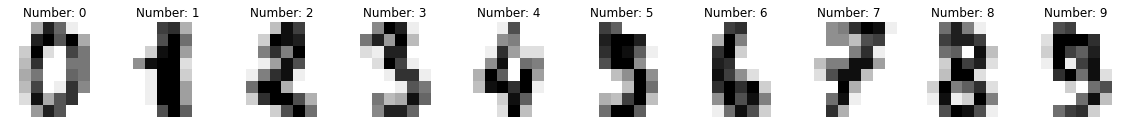

In [ ]:
    from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

digits = load_digits()
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=0)

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

models = {'Logistic': LogisticRegression(random_state=0),
          'KNN': KNeighborsClassifier(n_neighbors=3),
          'RandomForest': RandomForestClassifier(random_state=0),
          'GradientBoost': GradientBoostingClassifier(random_state=0),
          'DecisionTree': DecisionTreeClassifier(criterion='entropy', random_state=0),
          'LinearSVC': LinearSVC(random_state=0),
          'SVC': SVC(random_state=0)
}

scores={}
for model_name, model in models.items():
    model.fit(X_train_std, y_train)
    y_train_pred = model.predict(X_train_std)
    y_test_pred = model.predict(X_test_std)
    m = confusion_matrix(y_train, y_train_pred)
    print(f"<{model_name}>")
    print(f"train_data:")
    print(m)
    m = confusion_matrix(y_test, y_test_pred)
    print(f"test_data:")
    print(m, '\n')
    scores[(model_name, 'train', 'accuracy')] = accuracy_score(y_train, y_train_pred)
    scores[(model_name, 'test', 'accuracy')] = accuracy_score(y_test, y_test_pred)
    scores[(model_name, 'train', 'precision')] = precision_score(y_train, y_train_pred, average='macro')
    scores[(model_name, 'test', 'precision')] = precision_score(y_test, y_test_pred, average='macro')
    scores[(model_name, 'train', 'recall')] = recall_score(y_train, y_train_pred, average='macro')
    scores[(model_name, 'test', 'recall')] = recall_score(y_test, y_test_pred, average='macro')
    scores[(model_name, 'train', 'f1')] = f1_score(y_train, y_train_pred, average='macro')
    scores[(model_name, 'test', 'f1')] = f1_score(y_test, y_test_pred, average='macro')

plt.figure(figsize=(20, 5))
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(1, 10, label+1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Number: {label}')

pd.Series(scores).unstack().unstack()

----
종합 연습 문제2 </br>
아래의 링크에 있는 데이터를 이용하여 전복의 나이를 예측하는 모델을 구축해 보기 </br>
목표 변수는 Rings</br>
http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/MyDrive/DataScience/chap11/abalone.data'
abalone = pd.read_csv(filename, names=['sex', 'length', 'diameter', 'height', 
                          'whole_weight', 'shucked_weight', 
                          'viscera_weight', 'shell_weight', 'rings'])
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
abalone.isnull().sum().sum()

0

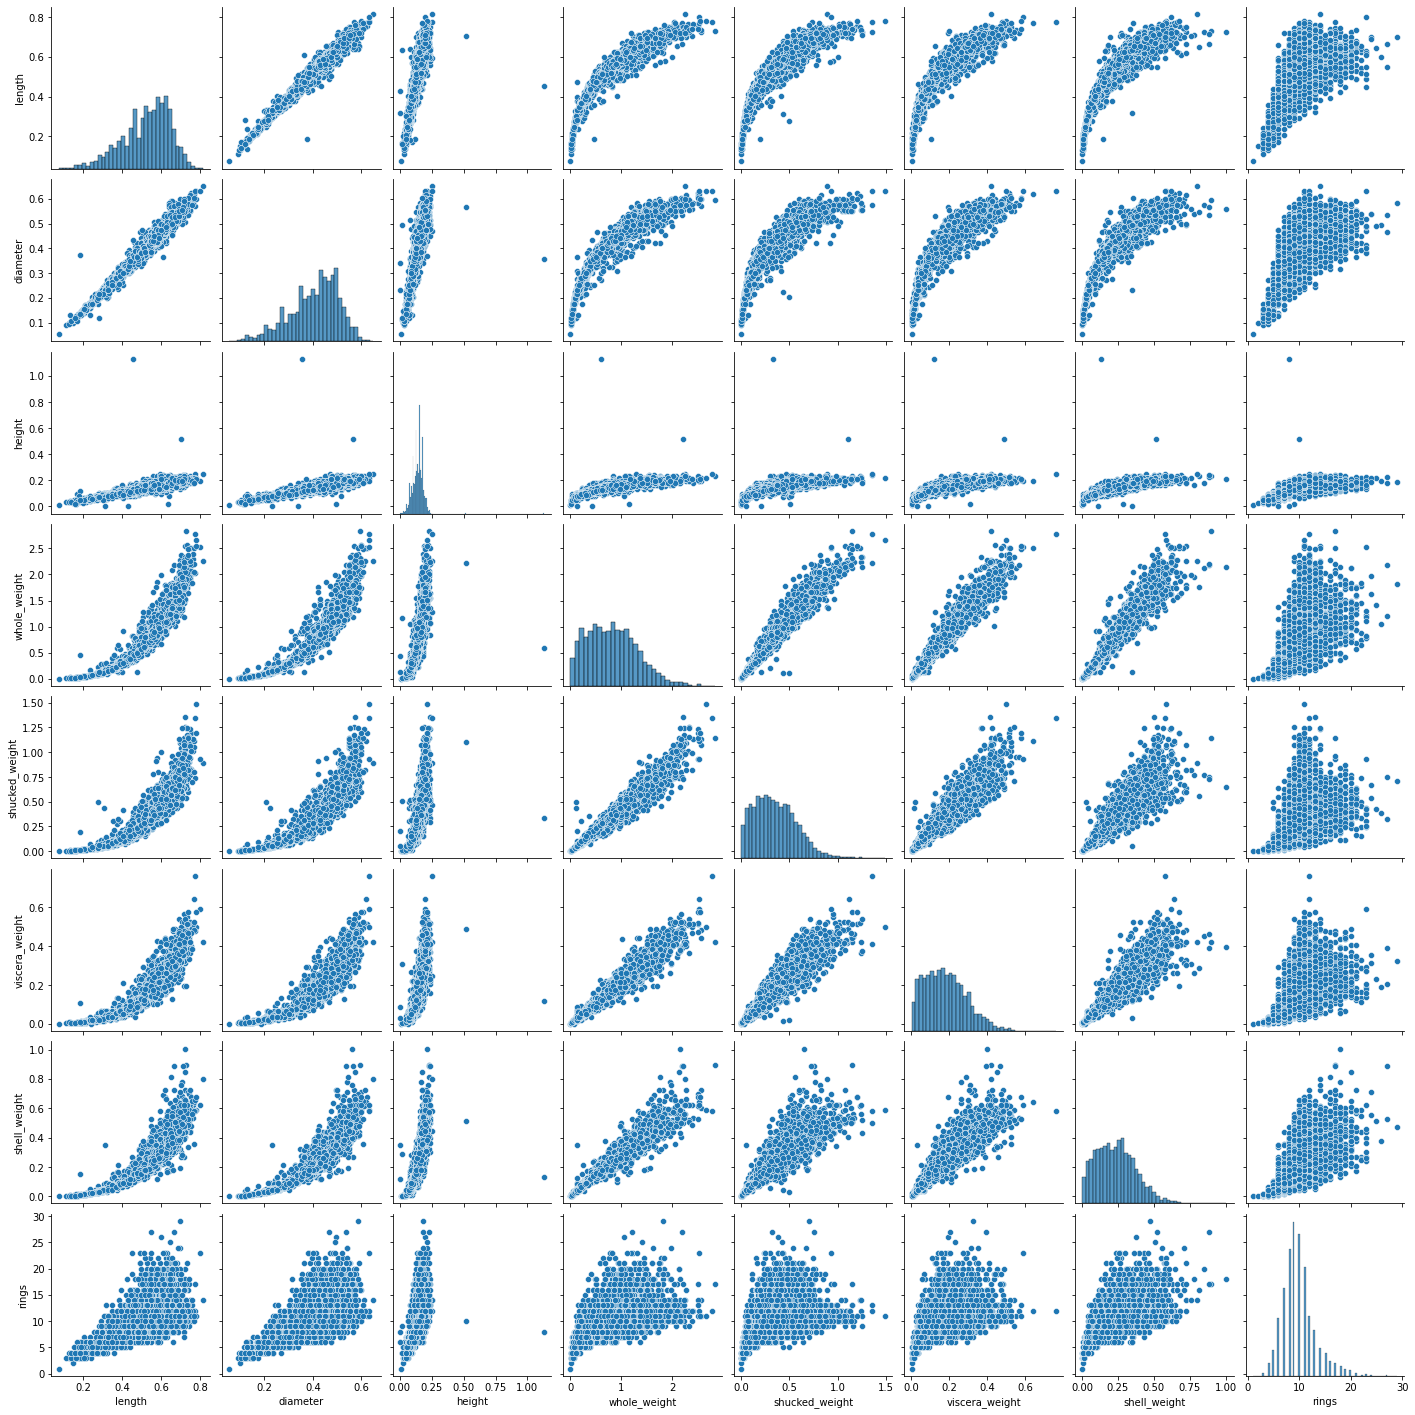

In [ ]:
sns.pairplot(abalone)

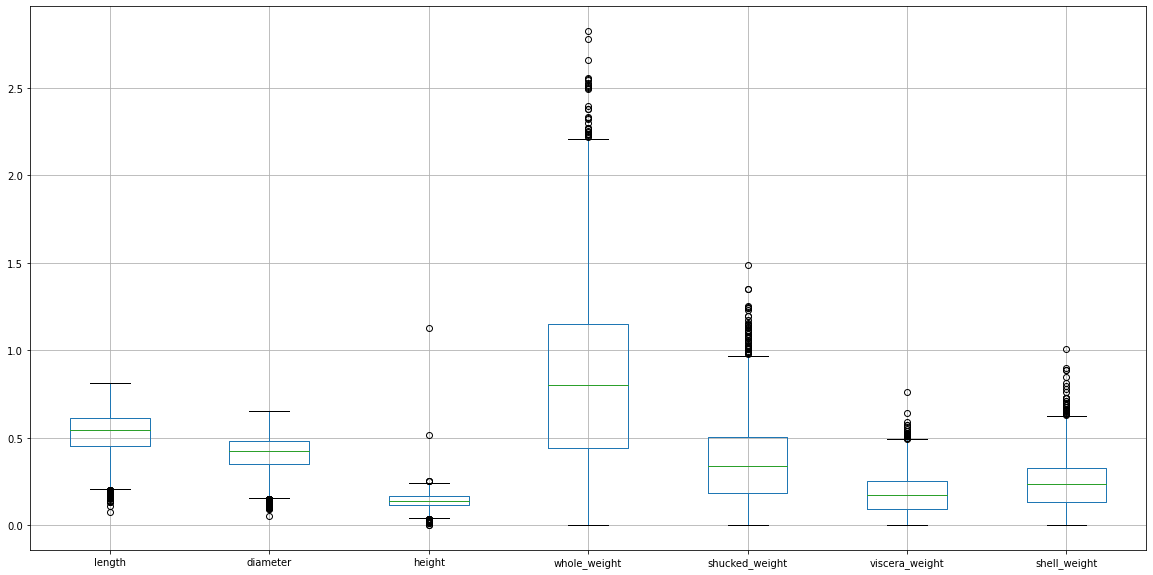

In [ ]:
plt.figure(figsize=(20,10))
abalone.drop(['sex','rings'], axis=1).boxplot()

In [ ]:
abalone.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = abalone.drop(['sex', 'shell_weight', 'rings'], axis=1)
y = abalone.rings
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

models = {'LinearRegression': LinearRegression(),
          'DecisionTreeRegressor': DecisionTreeRegressor(),
          'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5),
          'RandomForestRegressor': RandomForestRegressor(),
          'Lasso': Lasso(),
          'Ridge': Ridge()}

scores={}
for model_name, model in models.items():
    model.fit(X_train_std, y_train)
    scores[(model_name, 'train')] = model.score(X_train_std, y_train)
    scores[(model_name, 'test')] = model.score(X_test_std, y_test)
pd.Series(scores).unstack()

,test,train
DecisionTreeRegressor,0.081404,1.000000
KNeighborsRegressor,0.459657,0.635596
Lasso,0.251757,0.225450
LinearRegression,0.530602,0.517069
RandomForestRegressor,0.513068,0.934616
Ridge,0.530959,0.517032


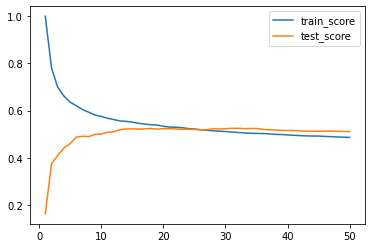

In [ ]:
train_scores = []
test_scores = []

for i in range(1, 51):
    model = KNeighborsRegressor(n_neighbors= i)
    model.fit(X_train_std, y_train)
    train_scores.append(model.score(X_train_std, y_train))
    test_scores.append(model.score(X_test_std, y_test))

plt.plot(np.linspace(1, 50, 50), train_scores, label='train_score')
plt.plot(np.linspace(1, 50, 50), test_scores, label='test_score')
plt.legend()

---
종합 연습 문제3<br>
아래 링크에 있는 금융기관 데이터를 이용하여 다음 질문에 답하기 <br>
http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip <br>

[문제 1]<br>
수치형 데이터(age, balance, day, duration, campaign, pdays, previous)의 기본적인 통계량(데이터 행 수, 최댓값, 최솟값, 표준편차 등)을 계산하라 <br>

[문제 2]<br>
변수 job, martial, education, default, housing, loan 기준으로 예금을 신청한 사람과 신청하지 않은 사람의 수를 계산하라<br>

[문제 3]<br>
y(예금 신청 여부)가 목표변수인 예측 모델을 로지스틱, SVM, 의사결정나무, K-NN, 랜덤 포레스트 등 여러 모델로 구축하고 (홀드 아웃 시 random_state=0) 각 모델을 검증 한 뒤<br>
하나의 모델을 선택하여 정확도, 정밀도, 재현율, F1 점수, 오차행렬을 출력하라<br>

[문제 4]<br>
문제 3에서 구축한 모델들의 ROC 곡선을 그려 AUC를 산출한 후 각 모델을 비교하라.

--------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bank = pd.read_csv('/content/drive/MyDrive/DataScience/dataset/bank-full.csv', sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# 문제 1
bank_sub = bank[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
print(f"데이터 행 수: {bank_sub.shape[0]}")
bank_sub.describe()

데이터 행 수: 45211


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# 문제 2
features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col_name in features:
    print(f"---------{col_name}---------")
    temp = pd.DataFrame([bank['y'].value_counts()[0], bank['y'].value_counts()[1]], index=['no', 'yes'], columns=['total']).T
    temp.columns.names = ['y']
    temp.index.names = [col_name]
    num_by_features = bank.groupby([col_name, 'y'])['y'].count().unstack()
    print(pd.concat([num_by_features, temp]))

---------job---------
y                 no   yes
job                       
admin.          4540   631
blue-collar     9024   708
entrepreneur    1364   123
housemaid       1131   109
management      8157  1301
retired         1748   516
self-employed   1392   187
services        3785   369
student          669   269
technician      6757   840
unemployed      1101   202
unknown          254    34
total          39922  5289
---------marital---------
y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912
total     39922  5289
---------education---------
y             no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252
total      39922  5289
---------default---------
y           no   yes
default             
no       39159  5237
yes        763    52
total    39922  5289
---------housing---------
y           no   yes
housing             
no       16727  3354
yes   

In [ ]:
# 문제 3
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {'Logistic': LogisticRegression(random_state=0),
          'svm': LinearSVC(random_state=0),
          'DecisionTree': DecisionTreeClassifier(random_state=0),
          'K-nn': KNeighborsClassifier(n_neighbors=5),
          'RandomForest': RandomForestClassifier(random_state=0)}

bank_dummy = pd.get_dummies(bank.drop(['y'], axis=1))
bank['y_to_num'] = bank['y'].map(lambda x:1 if x=='yes' else 0)
y = bank['y_to_num']

scores={}
X_train, X_test, y_train, y_test = train_test_split(bank_dummy, y, stratify=y, random_state=0)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    scores[(model_name, 'train', 'accuracy')] = accuracy_score(y_train, y_pred_train)
    scores[(model_name, 'test', 'accuracy')] = accuracy_score(y_test, y_pred_test)
    scores[(model_name, 'train', 'precision')] = precision_score(y_train, y_pred_train)
    scores[(model_name, 'test', 'precision')] = precision_score(y_test, y_pred_test)
    scores[(model_name, 'train', 'recall')] = recall_score(y_train, y_pred_train)
    scores[(model_name, 'test', 'recall')] = recall_score(y_test, y_pred_test)
    scores[(model_name, 'train', 'f1')] = f1_score(y_train, y_pred_train)
    scores[(model_name, 'test', 'f1')] = f1_score(y_test, y_pred_test)
    m_train = confusion_matrix(y_train, y_pred_train)
    m_test = confusion_matrix(y_test, y_pred_test)
    print("------------------------------------------------------------")
    print(f"--------------------{model_name}--------------------")
    print(f"train:\n{m_train}")
    print(f"test:\n{m_test}")

pd.Series(scores).unstack().unstack()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------------------------------------------------------------
--------------------Logistic--------------------
train:
[[29319   622]
 [ 2303  1664]]
test:
[[9758  223]
 [ 774  548]]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


------------------------------------------------------------
--------------------svm--------------------
train:
[[29941     0]
 [    0  3967]]
test:
[[9981    0]
 [   0 1322]]
------------------------------------------------------------
--------------------DecisionTree--------------------
train:
[[29941     0]
 [    0  3967]]
test:
[[9981    0]
 [   0 1322]]
------------------------------------------------------------
--------------------K-nn--------------------
train:
[[29261   680]
 [ 2375  1592]]
test:
[[9599  382]
 [ 954  368]]
------------------------------------------------------------
--------------------RandomForest--------------------
train:
[[29941     0]
 [    0  3967]]
test:
[[9981    0]
 [   0 1322]]


accuracy                  f1           precision            \
                  test     train      test     train      test     train   
DecisionTree  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
K-nn          0.881801  0.909903  0.355212  0.510338  0.490667  0.700704   
Logistic      0.911793  0.913737  0.523650  0.532225  0.710765  0.727909   
RandomForest  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
svm           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

                recall            
                  test     train  
DecisionTree  1.000000  1.000000  
K-nn          0.278366  0.401311  
Logistic      0.414523  0.419461  
RandomForest  1.000000  1.000000  
svm           1.000000  1.000000

In [ ]:
# 문제 3에서 모델 성능이 이상하리만치 좋음, feature의 수를 줄여서 다시 시도
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {'Logistic': LogisticRegression(),
          'svm': LinearSVC(),
          'DecisionTree': DecisionTreeClassifier(),
          'K-nn': KNeighborsClassifier(n_neighbors=5),
          'RandomForest': RandomForestClassifier()}

bank_dummy = pd.get_dummies(bank[['job', 'marital', 'education', 'default', 'housing', 'loan', 'age', 'balance', 'campaign']])
bank['y_to_num'] = bank['y'].map(lambda x:1 if x=='yes' else 0)
y = bank['y_to_num']

scores={}
X_train, X_test, y_train, y_test = train_test_split(bank_dummy, y, stratify=y, random_state=0)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    scores[(model_name, 'train', 'accuracy')] = accuracy_score(y_train, y_pred_train)
    scores[(model_name, 'test', 'accuracy')] = accuracy_score(y_test, y_pred_test)
    scores[(model_name, 'train', 'precision')] = precision_score(y_train, y_pred_train)
    scores[(model_name, 'test', 'precision')] = precision_score(y_test, y_pred_test)
    scores[(model_name, 'train', 'recall')] = recall_score(y_train, y_pred_train)
    scores[(model_name, 'test', 'recall')] = recall_score(y_test, y_pred_test)
    scores[(model_name, 'train', 'f1')] = f1_score(y_train, y_pred_train)
    scores[(model_name, 'test', 'f1')] = f1_score(y_test, y_pred_test)
    m_train = confusion_matrix(y_train, y_pred_train)
    m_test = confusion_matrix(y_test, y_pred_test)
    print("------------------------------------------------------------")
    print(f"--------------------{model_name}--------------------")
    print(f"train:\n{m_train}")
    print(f"test:\n{m_test}")

pd.Series(scores).unstack().unstack()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------------------------------------------------------------
--------------------Logistic--------------------
train:
[[29934     7]
 [ 3964     3]]
test:
[[9980    1]
 [1321    1]]


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


------------------------------------------------------------
--------------------svm--------------------
train:
[[28806  1135]
 [ 3745   222]]
test:
[[9597  384]
 [1249   73]]
------------------------------------------------------------
--------------------DecisionTree--------------------
train:
[[29930    11]
 [  179  3788]]
test:
[[8818 1163]
 [ 943  379]]
------------------------------------------------------------
--------------------K-nn--------------------
train:
[[29487   454]
 [ 3004   963]]
test:
[[9693  288]
 [1190  132]]
------------------------------------------------------------
--------------------RandomForest--------------------
train:
[[29888    53]
 [  139  3828]]
test:
[[9656  325]
 [1074  248]]


accuracy                  f1           precision            \
                  test     train      test     train      test     train   
DecisionTree  0.813678  0.994397  0.264665  0.975534  0.245785  0.997105   
K-nn          0.869238  0.898018  0.151550  0.357727  0.314286  0.679605   
Logistic      0.883040  0.882889  0.001511  0.001509  0.500000  0.300000   
RandomForest  0.876228  0.994338  0.261741  0.975535  0.432810  0.986344   
svm           0.855525  0.856081  0.082069  0.083396  0.159737  0.163596   

                recall            
                  test     train  
DecisionTree  0.286687  0.954878  
K-nn          0.099849  0.242753  
Logistic      0.000756  0.000756  
RandomForest  0.187595  0.964961  
svm           0.055219  0.055962

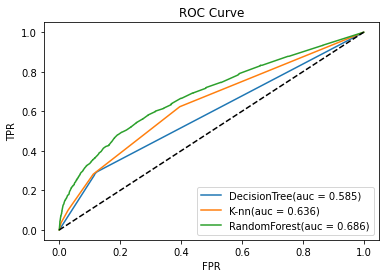

In [ ]:
# 문제 4
from sklearn.metrics import roc_curve, auc, roc_auc_score

models = {'DecisionTree': DecisionTreeClassifier(random_state=0),
          'K-nn': KNeighborsClassifier(n_neighbors=5),
          'RandomForest': RandomForestClassifier(random_state=0)}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    my_auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{model_name}(auc = {my_auc:.3f})")

plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)

-----------
종합 연습 문제4<br>
사이킷런의 유방암 데이터를 이용하여 정확도가 95.8퍼 보다 높은 LogisticRegression 모델 구축<br>
홀드아웃 시 random_state=0으로 지정

---

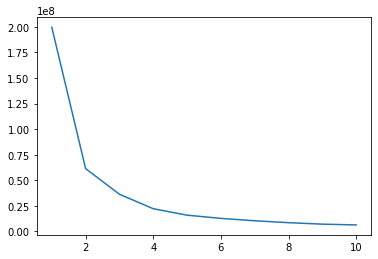

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state=0)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)

# 엘보우법으로 분석하여 cluster의 수를 2로 정함

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0, stratify=cancer.target)
print(pd.Series(cancer.target).value_counts())
print(pd.Series(y_train).value_counts())

1    357
0    212
dtype: int64
1    267
0    159
dtype: int64


In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
pca = PCA(n_components=5)
pca.fit(X_train_std)
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[[ 0.22   0.107  0.228  0.222  0.143  0.24   0.26   0.26   0.133  0.062
   0.205  0.021  0.21   0.2    0.008  0.166  0.16   0.186  0.039  0.105
   0.23   0.107  0.238  0.227  0.123  0.209  0.228  0.25   0.117  0.131]
 [-0.23  -0.043 -0.212 -0.228  0.19   0.15   0.045 -0.039  0.198  0.367
  -0.109  0.087 -0.092 -0.151  0.21   0.234  0.18   0.111  0.191  0.279
  -0.213 -0.031 -0.194 -0.213  0.191  0.151  0.093 -0.006  0.165  0.28 ]
 [-0.014  0.094 -0.014  0.024 -0.081 -0.068 -0.01  -0.026 -0.028 -0.025
   0.257  0.394  0.264  0.209  0.341  0.147  0.149  0.224  0.312  0.193
  -0.052 -0.009 -0.052 -0.015 -0.232 -0.234 -0.179 -0.171 -0.258 -0.232]
 [ 0.031 -0.598  0.033  0.047  0.155  0.036  0.029  0.069  0.045  0.059
   0.119 -0.345  0.108  0.126  0.08  -0.024  0.002  0.079  0.059  0.018
   0.004 -0.634  0.003  0.018  0.021 -0.087 -0.067  0.003 -0.055 -0.07 ]
 [ 0.039 -0.044  0.038  0.015 -0.372  0.011  0.071 -0.058 -0.296 -0.057
  -0.163 -0.181 -0.12  -0.124 -0.161  0.329  0.382  0.19  -0

In [ ]:
# K-Means는 어떻게 활용해야 할지 몰라 생략
scores_train = {}
scores_test = {}
for i in range(1,31):
    pca = PCA(n_components=i)
    pca.fit(X_train_std)
    X_train_pca = pca.transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)
    model = LogisticRegression()
    model.fit(X_train_pca, y_train)
    scores_train[(i)] = model.score(X_train_pca, y_train)
    scores_test[i] = model.score(X_test_pca, y_test)

print(pd.Series(scores_test).idxmax(), pd.Series(scores_test).max())
pd.Series(scores_test)

5 0.965034965034965


1     0.902098
2     0.923077
3     0.937063
4     0.937063
5     0.965035
6     0.958042
7     0.951049
8     0.965035
9     0.965035
10    0.965035
11    0.958042
12    0.958042
13    0.965035
14    0.958042
15    0.958042
16    0.958042
17    0.958042
18    0.958042
19    0.958042
20    0.958042
21    0.958042
22    0.958042
23    0.958042
24    0.958042
25    0.958042
26    0.958042
27    0.958042
28    0.958042
29    0.958042
30    0.958042
dtype: float64

In [ ]:
# 여기부터는 교재의 답
kmeans_pp = KMeans(n_clusters=5)
kmeans_pp.fit(X_train_std)
y_train_cl = kmeans_pp.fit_predict(X_train_std)
y_test_cl = kmeans_pp.fit_predict(X_test_std)
y_train_cl

array([1, 2, 3, 0, 1, 3, 1, 1, 0, 2, 3, 4, 2, 2, 2, 3, 2, 1, 3, 1, 1, 3,
       1, 1, 2, 3, 1, 2, 0, 1, 0, 2, 1, 3, 1, 1, 3, 1, 0, 1, 2, 1, 1, 3,
       0, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 2, 1, 1, 2, 3, 1, 1, 4, 3, 3, 3,
       1, 2, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 3, 0, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 3, 0, 3, 3, 3, 1, 1, 3, 1, 2, 2, 3, 1, 1, 2, 3, 3, 3, 3,
       3, 1, 4, 4, 0, 0, 1, 1, 3, 1, 2, 4, 1, 1, 2, 4, 1, 0, 4, 2, 1, 3,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 3, 3, 3, 0, 3, 4, 0, 1, 1, 1, 1,
       1, 3, 3, 4, 1, 3, 0, 1, 2, 4, 1, 4, 1, 1, 2, 4, 2, 1, 2, 4, 3, 0,
       1, 0, 3, 3, 0, 0, 2, 1, 1, 3, 0, 1, 3, 4, 2, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 3, 1, 0, 0, 0, 1, 2, 1,
       2, 4, 1, 2, 2, 1, 0, 3, 0, 0, 0, 1, 3, 1, 3, 1, 1, 1, 0, 0, 0, 4,
       4, 1, 3, 1, 1, 4, 2, 1, 1, 3, 3, 1, 1, 1, 2, 3, 3, 1, 2, 1, 0, 2,
       0, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 3, 1, 3, 0, 1, 3, 1, 1, 1,
       3, 2, 3, 0, 3, 1, 0, 3, 1, 3, 1, 3, 1, 0, 1,

In [ ]:
cl_train_data = pd.DataFrame(y_train_cl, columns=['cl_nm']).astype(str)
cl_train_data_dummy = pd.get_dummies(cl_train_data)
cl_test_data = pd.DataFrame(y_test_cl, columns=['cl_nm']).astype(str)
cl_test_data_dummy = pd.get_dummies(cl_test_data)

cl_train_data_dummy

,cl_nm_0,cl_nm_1,cl_nm_2,cl_nm_3,cl_nm_4
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
421,0,0,0,0,1
422,0,1,0,0,0
423,0,0,0,1,0
424,0,1,0,0,0


In [ ]:
merge_train_data = pd.concat([pd.DataFrame(X_train_std, columns = [str(x) for x in range(30)]), cl_train_data_dummy, pd.DataFrame(y_train, columns=['flg'])], axis=1)
merge_test_data = pd.concat([pd.DataFrame(X_test_std, columns = [str(x) for x in range(30)]), cl_test_data_dummy, pd.DataFrame(y_test, columns=['flg'])], axis=1)
merge_test_data

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,cl_nm_0,cl_nm_1,cl_nm_2,cl_nm_3,cl_nm_4,flg
0,-0.121153,-0.673078,-0.166470,-0.220737,-0.251423,-0.597329,-0.910270,-0.772696,-0.652322,-0.169322,...,-0.737374,-0.422644,-0.150450,-0.350116,0,1,0,0,0,1
1,1.599483,0.226153,1.549754,1.536769,0.532903,0.510035,0.671505,1.142150,-0.019966,-0.122190,...,0.718574,0.687879,-0.580474,0.413746,1,0,0,0,0,0
2,1.078582,0.294797,1.063879,0.966990,0.274571,0.470249,0.363034,0.718911,1.141204,-0.280726,...,-0.083444,0.502443,0.594143,-0.438688,1,0,0,0,0,0
3,-1.208673,2.042922,-1.213712,-1.004115,-1.179267,-1.095406,-0.937278,-0.984950,-0.689302,-0.459258,...,-0.975388,-0.996599,-0.961973,-0.672248,0,1,0,0,0,1
4,1.056416,1.191741,0.935383,0.944694,-0.554246,-0.640525,-0.405070,-0.046419,-0.996235,-1.090548,...,-0.310217,-0.025452,-0.655770,-0.256467,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1.050874,0.400051,1.304809,0.931207,1.917852,2.908534,2.947275,1.788547,1.130110,1.201805,...,3.088459,1.212784,0.584103,2.018197,0,0,0,1,0,0
139,-0.096217,-1.373243,-0.154423,-0.200919,-0.308112,-0.793225,-0.998460,-0.763314,-0.796544,-0.516389,...,-1.144394,-0.856625,-0.122005,-0.907499,0,1,0,0,0,1
140,0.565993,0.519033,0.573988,0.424186,0.324802,0.460777,0.200479,0.173949,1.303915,-0.546382,...,0.135511,0.237748,0.977315,-0.442073,1,0,0,0,0,0
141,-0.888651,-1.583751,-0.914155,-0.803729,-0.796074,-1.077408,-0.976316,-0.902280,-1.325357,-0.346426,...,-1.185839,-1.246639,-1.259810,-0.992686,0,1,0,0,0,1


In [ ]:
X_train_data = merge_train_data.drop('flg', axis=1)
X_test_data = merge_test_data.drop('flg', axis=1)

y_train_data = merge_train_data.flg
y_test_data = merge_test_data.flg

scores_train = {}
scores_test = {}
for i in range(1,31):
    pca = PCA(n_components=i)
    pca.fit(X_train_data)
    X_train_pca = pca.transform(X_train_data)
    X_test_pca = pca.transform(X_test_data)
    model = LogisticRegression()
    model.fit(X_train_pca, y_train_data)
    scores_train[(i)] = model.score(X_train_pca, y_train_data)
    scores_test[i] = model.score(X_test_pca, y_test_data)

print(f"best components num: {pd.Series(scores_test).idxmax()}\nbest score: {pd.Series(scores_test).max()}\n")
pd.Series(scores_test)

best components num: 8
best score: 0.9790209790209791



1     0.902098
2     0.923077
3     0.937063
4     0.937063
5     0.965035
6     0.958042
7     0.951049
8     0.979021
9     0.972028
10    0.965035
11    0.958042
12    0.958042
13    0.965035
14    0.965035
15    0.958042
16    0.958042
17    0.958042
18    0.951049
19    0.951049
20    0.958042
21    0.958042
22    0.958042
23    0.958042
24    0.958042
25    0.958042
26    0.958042
27    0.958042
28    0.958042
29    0.958042
30    0.958042
dtype: float64

-----
종합 연습 문제5<br>
2001/01/02부터 2016/12/30까지의 환율 데이터(달러/엔 환율 JPYUSD와 유로/달러 환율 USDEUR)를 이용해 아래 문제에 답하라<br>
DEXJPUS와 DEXUSEU는 각각 JPYUSD와 USDEUR로 생각<br>

In [ ]:
import pandas_datareader.data as pdr

start_date = '2001-01-02'
end_date = '2016-12-30'

fx_jpusdata = pdr.DataReader("DEXJPUS", "fred", start_date, end_date)
fx_useudata = pdr.DataReader("DEXUSEU", "fred", start_date, end_date)

[문제 1]<br>
데이터에는 공휴일과 휴일로 인한 결측값이 존재한다<br>
결측값이 있는 날과 가장 가까운 직전 날짜의 데이터로 결측값들을 대체하라<br>
(단, 년/월 데이터가 없는 경우에는 그대로 둔다)

[문제 2]<br>
데이터의 각 통계량을 확인하고 시계열 그래프를 그려라

[문제 3]<br>
당일과 전날의 차이를 계산하고 변화율 [(당일 - 전일)/전일 데이터]를 히스토그램으로 나타내라

[문제 4]<br>
미래 가격 (ex: 다음 날)을 예측하는 모델을 구축하라<br>
훈련 데이터는 2016년 11월 데이터를 사용하고, 당일 가격을 목표 변수로 설정한 뒤<br> 전일, 전전일, 3일 전 가격 데이터를 활용해 선형회귀 모델을 구축하여 2016년 12월 데이터를 테스트 데이터로 검증하라<br>
또, 다른 년도 데이터를 선택해 모델을 구축하고 검증한 경우 어떤 결과가 나오는지 확인하라

----------

In [ ]:
# 문제 1
fx_jpusdata.fillna(method='ffill', inplace = True)
fx_useudata.fillna(method='ffill', inplace = True)
fx_jpusdata

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-08,115.97
...,...
2016-12-26,117.22
2016-12-27,117.52
2016-12-28,117.66


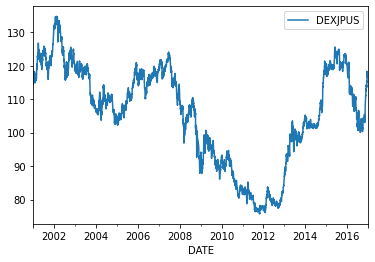

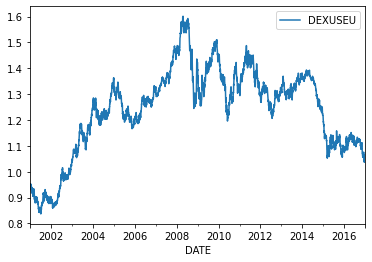

In [ ]:
# 문제 2
fx_jpusdata.describe()
fx_useudata.describe()
fx_jpusdata.plot()
fx_useudata.plot()

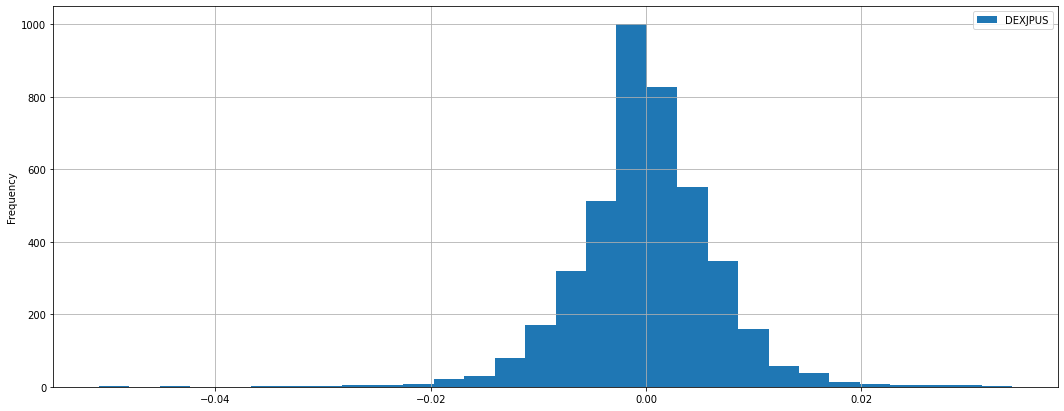

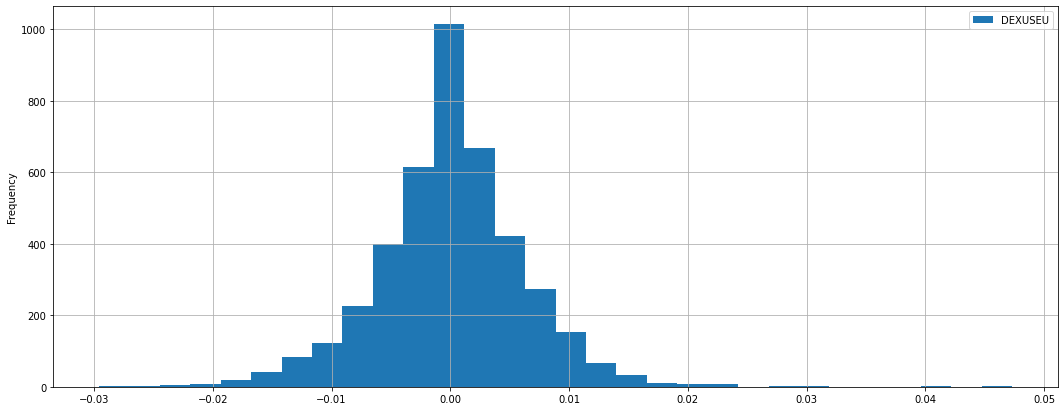

In [ ]:
# 문제 3
((fx_jpusdata - fx_jpusdata.shift(1)) / fx_jpusdata.shift(1)).plot(kind='hist', bins=30, figsize=(18,7), grid=True)
((fx_useudata - fx_useudata.shift(1)) / fx_useudata.shift(1)).plot(kind='hist', bins=30, figsize=(18,7), grid=True)

In [ ]:
# 문제 4
train_df = pd.concat([pd.DataFrame(np.array(fx_jpusdata.loc['2016-11'][:-3].DEXJPUS)),
           pd.DataFrame(np.array(fx_jpusdata.loc['2016-11'][1:-2].DEXJPUS)),
           pd.DataFrame(np.array(fx_jpusdata.loc['2016-11'][2:-1].DEXJPUS)),
           pd.DataFrame(np.array(fx_jpusdata.loc['2016-11'][3:].DEXJPUS))], axis=1)
train_df.columns=['3db', '2db', '1db', 'today']
train_df

,3db,2db,1db,today
0,104.59,103.22,103.17,103.02
1,103.22,103.17,103.02,104.60
2,103.17,103.02,104.60,104.98
3,103.02,104.60,104.98,104.84
4,104.60,104.98,104.84,106.56
5,104.98,104.84,106.56,106.56
6,104.84,106.56,106.56,108.30
7,106.56,106.56,108.30,108.94
8,106.56,108.30,108.94,109.16
9,108.30,108.94,109.16,109.64


In [ ]:
# 문제 4
test_df = pd.concat([pd.DataFrame(np.array(fx_jpusdata.loc['2016-12'][:-3].DEXJPUS)),
           pd.DataFrame(np.array(fx_jpusdata.loc['2016-12'][1:-2].DEXJPUS)),
           pd.DataFrame(np.array(fx_jpusdata.loc['2016-12'][2:-1].DEXJPUS)),
           pd.DataFrame(np.array(fx_jpusdata.loc['2016-12'][3:].DEXJPUS))], axis=1)
test_df.columns=['3db', '2db', '1db', 'today']
test_df

,3db,2db,1db,today
0,114.34,113.76,114.10,113.98
1,113.76,114.10,113.98,113.50
2,114.10,113.98,113.50,114.16
3,113.98,113.50,114.16,115.17
4,113.50,114.16,115.17,115.34
5,114.16,115.17,115.34,115.26
6,115.17,115.34,115.26,115.06
7,115.34,115.26,115.06,118.32
8,115.26,115.06,118.32,117.74
9,115.06,118.32,117.74,116.60


In [ ]:
from sklearn.linear_model import LinearRegression
X_train = train_df.drop('today',axis=1)
y_train = train_df.today
X_test = test_df.drop('today', axis=1)
y_test = test_df.today
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)

0.5387359996774156

In [ ]:
# 문제 4 - 교재의 정답
merge_data_jpus = pd.concat([fx_jpusdata,
                            fx_jpusdata.shift(1),
                            fx_jpusdata.shift(2),
                            fx_jpusdata.shift(3)], axis=1)

merge_data_jpus.dropna(inplace=True)
merge_data_jpus.columns = ['today', 'pre1', 'pre2', 'pre3']
merge_data_jpus

,today,pre1,pre2,pre3
DATE,,,,
2001-01-05,116.19,115.47,114.26,114.73
2001-01-08,115.97,116.19,115.47,114.26
2001-01-09,116.64,115.97,116.19,115.47
2001-01-10,116.26,116.64,115.97,116.19
2001-01-11,117.56,116.26,116.64,115.97
...,...,...,...,...
2016-12-26,117.22,117.22,117.48,117.79
2016-12-27,117.52,117.22,117.22,117.48
2016-12-28,117.66,117.52,117.22,117.22


----------
<h3>종합 연습 문제6 </h3>
아래의 미국 항공기 비행 데이터를 이용해 다음 질문에 답하라<br>
단, 1980년대 데이터만 이용 (pc 사양이 높다면 모든 년도 데이터 다 분석해도 됨)<br>

https://bit.ly/37jcP2L <br>

[문제 1]<br>
데이터에서 년도별(YEAR)x월별(MONTH) 로 평균 지연시간(DEP_DELAY)을 계산하고,<br>
결과를 통해 발견할 수 있는 사실이 무엇인지 생각해보라<br><br>

[문제 2]<br>
문제 1에서 산출된 결과에서 1월부터 12월까지의 시계열 데이터를 선 그래프로 그린 후,<br> 년도별로 비교할 수 있도록 하나의 그래프에 1987~1989년 데이터 그래프가 년도별로 늘어선 형태로 나타내라<br><br>

[문제 3]<br>
각 항공사(UNIQUE_CARRIER)별 평균 지연시간을 출발지(ORIGIN), 목적지(DEST)를 기준으로 계산하라. <br><br>

[문제 4]<br>
지연시간을 예측하는 예측 모델을 목표 변수를 DEP_DELAY, 설명 변수를 ARR_DELAY와 DISTANCE로 두고 구축하라<br>

-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
flight = pd.read_csv('/content/drive/MyDrive/DataScience/dataset/DelayedFlights.csv')
flight

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Year
2008    43.185176
Name: DepDelay, dtype: float64 

Month
1     43.545680
2     44.988440
3     42.885223
4     39.864115
5     39.041575
6     45.825926
7     46.659887
8     43.727971
9     38.236322
10    34.868737
11    40.052395
12    49.145089
Name: DepDelay, dtype: float64


([<matplotlib.axis.XTick at 0x7f5c61835ca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

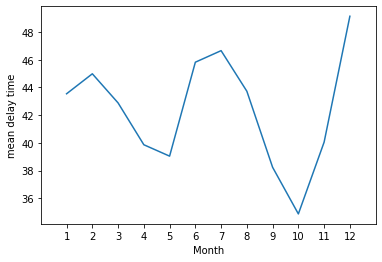

In [ ]:
print(flight.groupby('Year')['DepDelay'].mean(), '\n')
print(flight.groupby('Month')['DepDelay'].mean())
plt.plot(flight.Month.drop_duplicates().values ,flight.groupby('Month')['DepDelay'].mean())
plt.xlim([0,13])
plt.xlabel('Month')
plt.ylabel('mean delay time')
plt.xticks(range(1, 13))

In [ ]:
print(flight.groupby('UniqueCarrier')['DepDelay'].mean())
a = flight.groupby(['UniqueCarrier', 'Origin', 'Dest'])['DepDelay'].mean()
a

UniqueCarrier
9E    47.370338
AA    46.481953
AQ    26.680000
AS    38.300435
B6    55.030570
CO    43.138680
DL    39.059306
EV    48.308463
F9    27.701227
FL    42.535239
HA    33.124433
MQ    43.726198
NW    41.306088
OH    48.937311
OO    44.790943
UA    49.985710
US    38.806187
WN    34.718587
XE    50.098444
YV    55.430655
Name: DepDelay, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

new_flight = flight.dropna()
X_train, X_test, y_train, y_test = train_test_split(new_flight[['DepDelay', 'Distance']], new_flight.ArrDelay, random_state = 66)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
print(f"훈련 데이터의 스코어: {model.score(X_train, y_train):.3f}")
print(f"테스트 데이터의 스코어: {model.score(X_test, y_test):.3f}")
# ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
# ax.scatter(X_test_std[:,0], X_test_std[:,1], y_test)
model.coef_

훈련 데이터의 스코어: 0.903
테스트 데이터의 스코어: 0.903


array([9.647e-01, 1.439e-04])

In [ ]:
pd.DataFrame(flight.groupby('Origin')['DepDelay'].mean())

,DepDelay
Origin,
ABE,59.461538
ABI,66.469388
ABQ,36.358254
ABY,49.448630
ACK,66.474490
...,...
WYS,25.100000
XNA,55.901034
YAK,56.717822
